In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
rawData_deltaF = pd.read_csv("/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/DATA/Randi_etal/Fig2A_deltaF_over_F.csv") #values are average across trials and animals (113 animals)
rawData_deltaF = rawData_deltaF.set_index(rawData_deltaF.columns[0])
rawData_alpha = pd.read_csv("/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/DATA/Randi_etal/Fig2a_alpha(1-qvalue).csv") #values are average across trials and animals (113 animals)
rawData_alpha = rawData_alpha.set_index(rawData_alpha.columns[0])

### Make a plot that shows correlation between ASJ (one for L and one for right) with other neurons, when stimulated and when responding, with alpha on x-axis and deltaF/F on y-axis (so 4 plots total) ###

In [48]:
# Make a dataframe for the data
# print(rawData_deltaF.head())
# not entirley sure if rows or columns indicate if neuron was stimulated or is responding.......
rawdata_deltaF_ASJL_stimulated = rawData_deltaF.loc['ASJL']
rawdata_alpha_ASJL_stimulated = rawData_alpha.loc['ASJL']
rawdata_deltaF_ASJR_stimulated = rawData_deltaF.loc['ASJR']
rawdata_alpha_ASJR_stimulated = rawData_alpha.loc['ASJR']
rawdata_deltaF_ASJL_responding = rawData_deltaF.T.loc['ASJL'] #first transpose the data so that the responding neuron names are the columns
rawdata_alpha_ASJL_responding = rawData_alpha.T.loc['ASJL'] 
rawdata_deltaF_ASJR_responding = rawData_deltaF.T.loc['ASJR'] 
rawdata_alpha_ASJR_responding = rawData_alpha.T.loc['ASJR']
print(len(rawdata_deltaF_ASJL_stimulated)) #168 neurons

print(rawdata_deltaF_ASJL_stimulated[0:4])
print(rawdata_deltaF_ASJL_responding[0:4])


# Rows and columns are neuron names and values are deltaF/F or alpha values for between neurons

168
ADEL    0.014986
ADER   -0.090489
ADFL    0.015651
ADLL    0.109943
Name: ASJL, dtype: float64
Unnamed: 0
ADEL    0.066157
ADER    0.069101
ADFL    0.026345
ADLL    0.064681
Name: ASJL, dtype: float64


/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_72374/149325191.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[i] > 0.8 and y[i] > 0.2:
/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_72374/149325191.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (x[i], y[i] + 0.025))


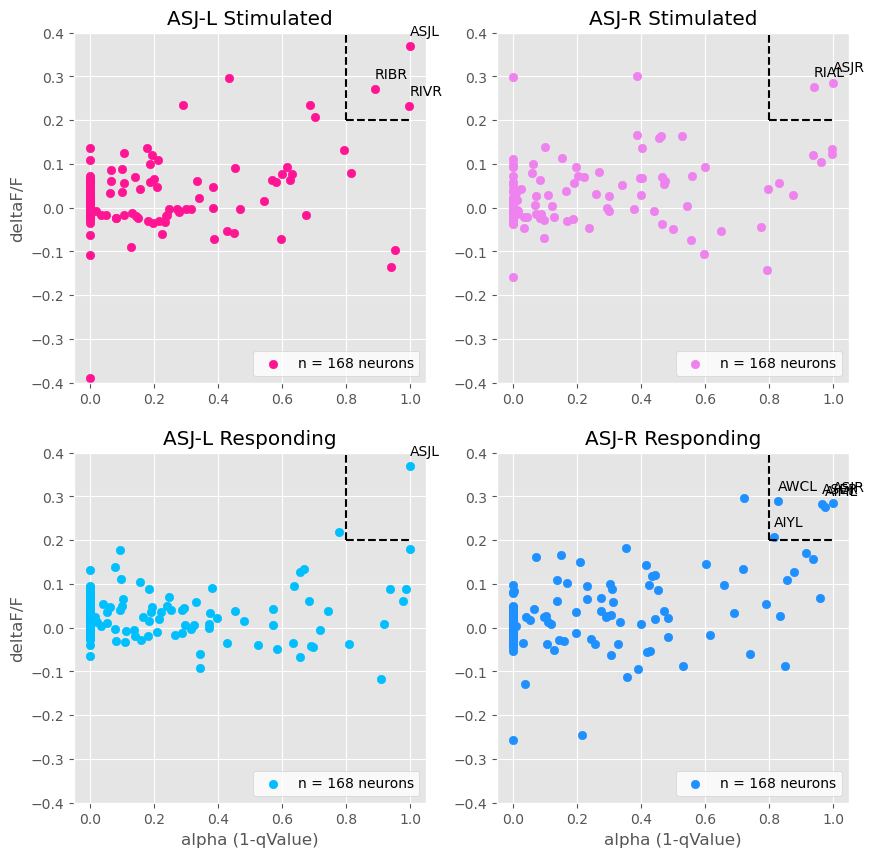

In [49]:
# Plotting

# Plot 1: ASJL stimulated vs. other neurons responding
# Plot 2: ASJR stimulated vs. other neurons responding
# Plot 3: ASJL responding vs. other neurons stimulated
# Plot 4: ASJR responding vs. other neurons stimulated

plt.style.use("ggplot") #to have plot look more like ggplot2 in R

def label_points(x, y, ax):
    for i, txt in enumerate(x.index):
        if x[i] > 0.8 and y[i] > 0.2:
            ax.annotate(txt, (x[i], y[i] + 0.025))



fig, axs = plt.subplots(2, 2, figsize=(10, 10))
ax1 = axs[0, 0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]

ax1.scatter(rawdata_alpha_ASJL_stimulated, rawdata_deltaF_ASJL_stimulated, color = 'deeppink', label = 'n = 168 neurons')
label_points(rawdata_alpha_ASJL_stimulated, rawdata_deltaF_ASJL_stimulated, ax1)
ax1.set_title('ASJ-L Stimulated')
ax1.set_ylabel('deltaF/F')
ax1.set_ylim(-0.4,0.4)
ax1.vlines(0.8, 0.2, 0.4, color = 'black', linestyle = 'dashed')
ax1.hlines(0.2, 0.8, 1, color = 'black', linestyle = 'dashed')
ax1.legend(loc = 'lower right', facecolor = 'white')

ax2.scatter(rawdata_alpha_ASJR_stimulated, rawdata_deltaF_ASJR_stimulated, color = 'violet', label = 'n = 168 neurons')
label_points(rawdata_alpha_ASJR_stimulated, rawdata_deltaF_ASJR_stimulated, ax2)
ax2.set_title('ASJ-R Stimulated')
ax2.set_ylim(-0.4,0.4)
ax2.vlines(0.8, 0.2, 0.4, color = 'black', linestyle = 'dashed')
ax2.hlines(0.2, 0.8, 1, color = 'black', linestyle = 'dashed')
ax2.legend(loc = 'lower right', facecolor = 'white')


ax3.scatter(rawdata_alpha_ASJL_responding, rawdata_deltaF_ASJL_responding, color = 'deepskyblue', label = 'n = 168 neurons')
label_points(rawdata_alpha_ASJL_responding, rawdata_deltaF_ASJL_responding, ax3)
ax3.set_title('ASJ-L Responding')
ax3.set_xlabel('alpha (1-qValue)')
ax3.set_ylabel('deltaF/F')
ax3.set_ylim(-0.4,0.4)
ax3.vlines(0.8, 0.2, 0.4, color = 'black', linestyle = 'dashed')
ax3.hlines(0.2, 0.8, 1, color = 'black', linestyle = 'dashed')
ax3.legend(loc = 'lower right', facecolor = 'white')


ax4.scatter(rawdata_alpha_ASJR_responding, rawdata_deltaF_ASJR_responding, color = 'dodgerblue', label = 'n = 168 neurons')
label_points(rawdata_alpha_ASJR_responding, rawdata_deltaF_ASJR_responding, ax4)
ax4.set_title('ASJ-R Responding')
ax4.set_xlabel('alpha (1-qValue)')
ax4.set_ylim(-0.4,0.4)
ax4.vlines(0.8, 0.2, 0.4, color = 'black', linestyle = 'dashed')
x_min, x_max = ax4.get_xlim()
ax4.hlines(0.2, 0.8, 1, color = 'black', linestyle = 'dashed')
ax4.legend(loc = 'lower right', facecolor = 'white')

# fig.savefig("", dpi = 900)

In [51]:
rawdata_deltaF_AIBL_stimulated = rawData_deltaF.loc['AIBL']
rawdata_alpha_AIBL_stimulated = rawData_alpha.loc['AIBL']
rawdata_deltaF_AIBR_stimulated = rawData_deltaF.loc['AIBR']
rawdata_alpha_AIBR_stimulated = rawData_alpha.loc['AIBR']
rawdata_deltaF_AIBL_responding = rawData_deltaF.T.loc['AIBL'] #first transpose the data so that the responding neuron names are the columns
rawdata_alpha_AIBL_responding = rawData_alpha.T.loc['AIBL'] 
rawdata_deltaF_AIBR_responding = rawData_deltaF.T.loc['AIBR'] 
rawdata_alpha_AIBR_responding = rawData_alpha.T.loc['AIBR']

/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_72374/3604086770.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[i] > 0.8 and y[i] > 0.2:
/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_72374/3604086770.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (x[i], y[i] - deviation))


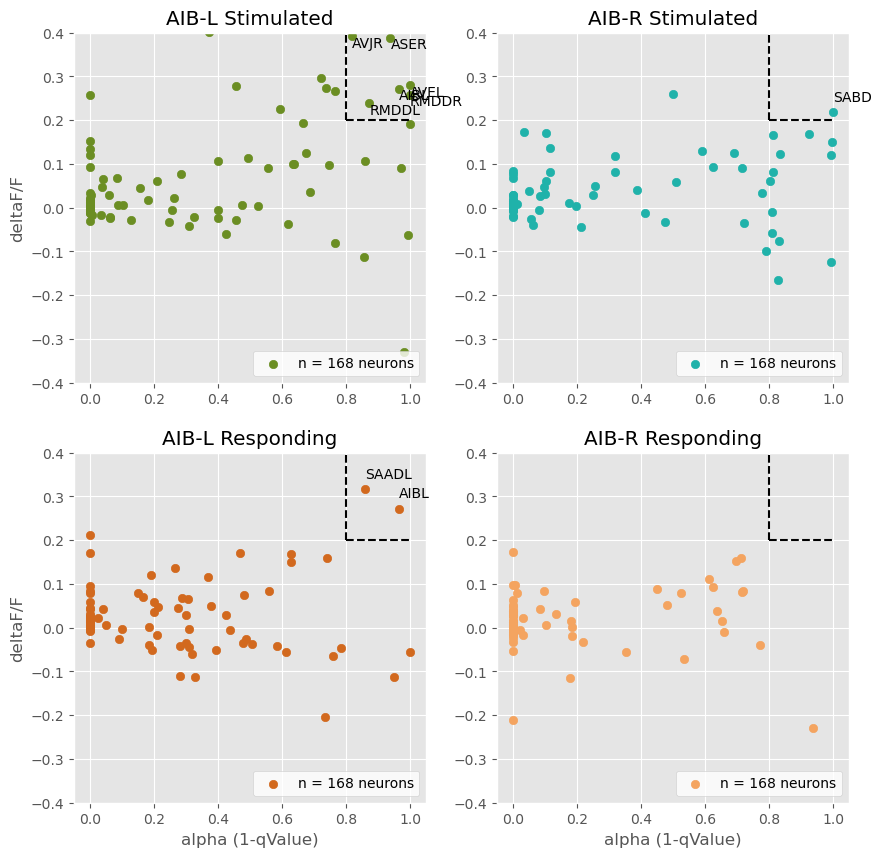

In [56]:
plt.style.use("ggplot") #to have plot look more like ggplot2 in R

def label_points(x, y, ax, deviation):
    for i, txt in enumerate(x.index):
        if x[i] > 0.8 and y[i] > 0.2:
            ax.annotate(txt, (x[i], y[i] - deviation))

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
ax1 = axs[0, 0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]

ax1.scatter(rawdata_alpha_AIBL_stimulated, rawdata_deltaF_AIBL_stimulated, color = 'olivedrab', label = 'n = 168 neurons')
label_points(rawdata_alpha_AIBL_stimulated, rawdata_deltaF_AIBL_stimulated, ax1, 0.025)
ax1.set_title('AIB-L Stimulated')
ax1.set_ylabel('deltaF/F')
ax1.set_ylim(-0.4,0.4)
ax1.vlines(0.8, 0.2, 0.4, color = 'black', linestyle = 'dashed')
ax1.hlines(0.2, 0.8, 1, color = 'black', linestyle = 'dashed')
ax1.legend(loc = 'lower right', facecolor = 'white')

ax2.scatter(rawdata_alpha_AIBR_stimulated, rawdata_deltaF_AIBR_stimulated, color = 'lightseagreen', label = 'n = 168 neurons')
label_points(rawdata_alpha_AIBR_stimulated, rawdata_deltaF_AIBR_stimulated, ax2, -0.025)
ax2.set_title('AIB-R Stimulated')
ax2.set_ylim(-0.4,0.4)
ax2.vlines(0.8, 0.2, 0.4, color = 'black', linestyle = 'dashed')
ax2.hlines(0.2, 0.8, 1, color = 'black', linestyle = 'dashed')
ax2.legend(loc = 'lower right', facecolor = 'white')


ax3.scatter(rawdata_alpha_AIBL_responding, rawdata_deltaF_AIBL_responding, color = 'chocolate', label = 'n = 168 neurons')
label_points(rawdata_alpha_AIBL_responding, rawdata_deltaF_AIBL_responding, ax3, -0.025)
ax3.set_title('AIB-L Responding')
ax3.set_xlabel('alpha (1-qValue)')
ax3.set_ylabel('deltaF/F')
ax3.set_ylim(-0.4,0.4)
ax3.vlines(0.8, 0.2, 0.4, color = 'black', linestyle = 'dashed')
ax3.hlines(0.2, 0.8, 1, color = 'black', linestyle = 'dashed')
ax3.legend(loc = 'lower right', facecolor = 'white')


ax4.scatter(rawdata_alpha_AIBR_responding, rawdata_deltaF_AIBR_responding, color = 'sandybrown', label = 'n = 168 neurons')
label_points(rawdata_alpha_AIBR_responding, rawdata_deltaF_AIBR_responding, ax4, -0.025)
ax4.set_title('AIB-R Responding')
ax4.set_xlabel('alpha (1-qValue)')
ax4.set_ylim(-0.4,0.4)
ax4.vlines(0.8, 0.2, 0.4, color = 'black', linestyle = 'dashed')
x_min, x_max = ax4.get_xlim()
ax4.hlines(0.2, 0.8, 1, color = 'black', linestyle = 'dashed')
ax4.legend(loc = 'lower right', facecolor = 'white')


# fig.savefig("", dpi = 90)